In [30]:
#https://www.kaggle.com/code/nastyrunner13/housing-price-prediction

import numpy as np
import pandas as pd 
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings(action='ignore')


In [19]:
# Modify Pandas display options to show more rows and columns
pd.set_option('display.max_rows', None)  # Set to None for unlimited rows
pd.set_option('display.max_columns', None)  # Set to None for unlimited columns
pd.set_option('display.width', None)  # Set to None for automatic width

#Import Data
data = pd.read_csv("housing.csv")
data = pd.DataFrame(data)

#Make Variable Dummy
data = pd.get_dummies(data = data, columns=['Neighborhood'])
data.replace({True:1, False:0}, inplace = True)

data = pd.DataFrame(data)
print(data.head())
print(data.describe)


   SquareFeet  Bedrooms  Bathrooms  YearBuilt          Price  \
0        2126         4          1       1969  215355.283618   
1        2459         3          2       1980  195014.221626   
2        1860         2          1       1970  306891.012076   
3        2294         2          1       1996  206786.787153   
4        2130         5          2       2001  272436.239065   

   Neighborhood_Rural  Neighborhood_Suburb  Neighborhood_Urban  
0                   1                    0                   0  
1                   1                    0                   0  
2                   0                    1                   0  
3                   0                    0                   1  
4                   0                    1                   0  


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [35]:
res = stats.shapiro(data)

res.pvalue #The Normality Assumption is violated... Linear regression should not be used

0.0

Null Values:
SquareFeet             0
Bedrooms               0
Bathrooms              0
YearBuilt              0
Price                  0
Neighborhood_Rural     0
Neighborhood_Suburb    0
Neighborhood_Urban     0
dtype: int64


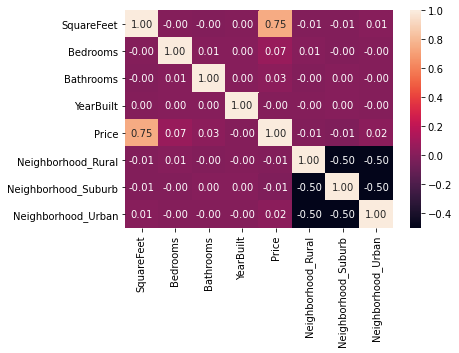

In [20]:
print(f"Null Values:\n{data.isnull().sum()}")


sns.heatmap(data.corr(method='pearson'), annot=True, fmt=".2f")


#Drop low correlated variables

X = data.drop(columns = ["Price", "Neighborhood_Rural", "Neighborhood_Urban", "Neighborhood_Suburb", "YearBuilt"], axis = 1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1337)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


In [21]:
#Linear Regression

lr = LinearRegression()

lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression R2: {r2score}")
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression MAE: {mae}")


Linear Regression R2: 0.5737258902651705
Linear Regression MSE: 2460197413.3657026
Linear Regression MAE: 39576.59690678077


In [22]:
#L1 regularization

lasso = Lasso(alpha=0.1)

lasso.fit(X_train_std, y_train)
y_pred = lasso.predict(X_test_std)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Lasso Regression R2: {r2score}")
print(f"Lasso Regression MSE: {mse}")
print(f"Lasso Regression MAE: {mae}")


Lasso Regression R2: 0.5737258734925311
Lasso Regression MSE: 2460197510.167275
Lasso Regression MAE: 39576.59782282802


In [23]:
#L2 regularization (Best Performer)

ridge = Ridge(alpha=0.1)

ridge.fit(X_train_std, y_train)
y_pred = ridge.predict(X_test_std)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Ridge Regression R2: {r2score}")
print(f"Ridge Regression MSE: {mse}")
print(f"Ridge Regression MAE: {mae}")


Ridge Regression R2: 0.5737258970474842
Ridge Regression MSE: 2460197374.222273
Ridge Regression MAE: 39576.596710003454


In [24]:
#Elastic Net

ElasticNet = ElasticNet()

ElasticNet.fit(X_train_std, y_train)
y_pred = ElasticNet.predict(X_test_std)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Elastic Net Regression R2: {r2score}")
print(f"Elastic Net Regression MSE: {mse}")
print(f"Elastic Net Regression MAE: {mae}")


Elastic Net Regression R2: 0.5104787005649989
Elastic Net Regression MSE: 2825222098.0687113
Elastic Net Regression MAE: 42444.88104959151


In [25]:
#Decision Tree Regressor

dt = DecisionTreeRegressor()

dt.fit(X_train_std, y_train)
y_pred = dt.predict(X_test_std)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"DT Regression R2: {r2score}")
print(f"DT Regression MSE: {mse}")
print(f"DT Regression MAE: {mae}")


DT Regression R2: 0.26618389171932166
DT Regression MSE: 4235144594.1702785
DT Regression MAE: 51800.50040799367


In [26]:
#RF Regressor

rf = RandomForestRegressor()

rf.fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RF Regression R2: {r2score}")
print(f"RF Regression MSE: {mse}")
print(f"RF Regression MAE: {mae}")


RF Regression R2: 0.4291924735389393
RF Regression MSE: 3294357241.1722183
RF Regression MAE: 45883.398939027546


In [27]:
#GB Regressor

gb = GradientBoostingRegressor()

gb.fit(X_train_std, y_train)
y_pred = gb.predict(X_test_std)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"GB Regression R2: {r2score}")
print(f"GB Regression MSE: {mse}")
print(f"GB Regression MAE: {mae}")


GB Regression R2: 0.5720983561473033
GB Regression MSE: 2469590560.018292
GB Regression MAE: 39668.36117700695


In [28]:
#ADA Regressor

ada = AdaBoostRegressor()

ada.fit(X_train_std, y_train)
y_pred = ada.predict(X_test_std)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"ADA Regression R2: {r2score}")
print(f"ADA Regression MSE: {mse}")
print(f"ADA Regression MAE: {mae}")


ADA Regression R2: 0.5666522219321755
ADA Regression MSE: 2501022366.4614162
ADA Regression MAE: 39911.85150921656


In [29]:
#KNM Regressor

knm = KNeighborsRegressor()

knm.fit(X_train_std, y_train)
y_pred = knm.predict(X_test_std)

r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"KNM Regression R2: {r2score}")
print(f"KNM Regression MSE: {mse}")
print(f"KNM Regression MAE: {mae}")


KNM Regression R2: 0.49771044417566157
KNM Regression MSE: 2898912783.533467
KNM Regression MAE: 43031.62832450397
